<a href="https://colab.research.google.com/github/thoufiqz55/LogisticRegression/blob/main/Logistic_Regression_PR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

Loading Dataset

In [5]:
data = pd.read_csv('portu_banking_final.csv')
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
data['y']

0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  object 
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  float64
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [8]:
data.groupby('y').describe()

duration                                                              \
     count        mean         std   min    25%    50%     75%     max   
y                                                                        
0  36548.0  220.844807  207.096293   0.0   95.0  163.5  279.00  4918.0   
1   4640.0  553.191164  401.171871  37.0  253.0  449.0  741.25  4199.0   

  campaign            ... euribor3m        nr_employed               \
     count      mean  ...       75%    max       count         mean   
y                     ...                                             
0  36548.0  2.633085  ...     4.962  5.045     36548.0  5176.166600   
1   4640.0  2.051724  ...     4.406  5.045      4640.0  5095.115991   

                                                      
         std     min     25%     50%     75%     max  
y                                                     
0  64.571979  4963.6  5099.1  5195.8  5228.1  5228.1  
1  87.572641  4963.6  5017.5  5099.1  5191.0  5228.1  

[2 rows x 72 columns]

In [9]:
#checking wheather two classes are balanced or not
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


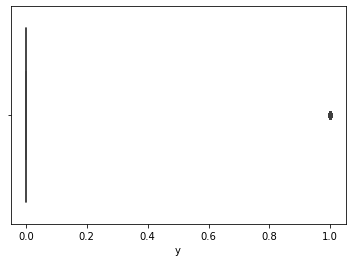

In [10]:
sns.boxplot(data['y'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


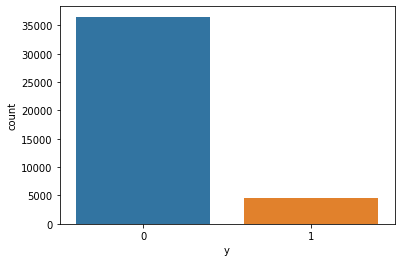

In [11]:
sns.countplot(data['y'])
plt.show()

data Cleaning

In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [13]:
data.job.unique()

array(['blue-collar', 'technician', 'management', 'services', 'retired',
       'admin.', 'housemaid', 'unemployed', 'entrepreneur',
       'self-employed', 'unknown', 'student', 'MANAGEMENT', 'RETIRED',
       'STUDENT', 'ADMIN.', 'TECHNICIAN', 'BLUE-COLLAR', 'HOUSEMAID',
       'SERVICES', 'UNKNOWN'], dtype=object)

In [14]:
data['job']=data['job'].replace({'blue-collar':'BLUE-COLLAR','technician':'TECHNICIAN','management':'MANAGEMENT',\
                   'services':'SERVICES','retired':'RETIRED','admin.':'ADMIN','ADMIN.':'ADMIN','housemaid':'HOUSEMAID',\
                   'unemployed':'UNEMPLOYED','entrepreneur':'ENTREPRENEUR','self-employed':'SELF-EMPLOYED',\
                   'unknown':'ADMIN','UNKNOWN':'ADMIN','student':'STUDENT'})

In [15]:
data.job.unique()

array(['BLUE-COLLAR', 'TECHNICIAN', 'MANAGEMENT', 'SERVICES', 'RETIRED',
       'ADMIN', 'HOUSEMAID', 'UNEMPLOYED', 'ENTREPRENEUR',
       'SELF-EMPLOYED', 'STUDENT'], dtype=object)

In [16]:
data.job.value_counts()

ADMIN            10752
BLUE-COLLAR       9254
TECHNICIAN        6743
SERVICES          3969
MANAGEMENT        2924
RETIRED           1720
ENTREPRENEUR      1456
SELF-EMPLOYED     1421
HOUSEMAID         1060
UNEMPLOYED        1014
STUDENT            875
Name: job, dtype: int64

In [17]:
obj_cols = data.select_dtypes(include='object')
obj_cols

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,44,BLUE-COLLAR,married,basic.4y,unknown,yes,no,cellular,aug,thu,nonexistent
1,53,TECHNICIAN,married,unknown,no,no,no,cellular,nov,fri,nonexistent
2,28,MANAGEMENT,single,university.degree,no,yes,no,cellular,jun,thu,success
3,39,SERVICES,married,high.school,no,no,no,cellular,apr,fri,nonexistent
4,55,RETIRED,married,basic.4y,no,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...,...,...
41183,59,RETIRED,married,high.school,unknown,no,yes,telephone,jun,thu,nonexistent
41184,31,HOUSEMAID,married,basic.4y,unknown,no,no,telephone,may,thu,nonexistent
41185,42,ADMIN,single,university.degree,unknown,yes,yes,telephone,may,wed,nonexistent
41186,48,TECHNICIAN,married,professional.course,no,no,yes,telephone,oct,tue,nonexistent


In [18]:
data.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [19]:
data['age'] = data['age'].replace({'35-30':'33','30-35':'33','25-30':'28','18-25':'22','30-32':'31','50-55':'53','45-50':'48','20-25':'23','20-40':'30','35-40':'38','30-40':'35'})

In [20]:
data.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '25', '57', '63', '58', '60', '64', '51', '23', '20', '74',
       '80', '61', '62', '75', '21', '82', '77', '22', '70', '76', '73',
       '66', '71', '19', '79', '88', '65', '67', '81', '18', '84', '69',
       '98', '85', '83', '78', '92', '86', '94', '17', '91', '89', '87',
       '95', 56, 39, 30, 53, 37, 22, 45, 31, 24, 50, 58, 33, 27, 28, 32,
       51, 41, 49, 43, 44, 35, 29, 26, 57, 25, 42, 48, 46, 67, 38, 34, 54,
       40, 23, 47, 62, 75, 55, 36, 52, 59, 78, 70, 60, 20, 66, 61, 21, 88,
       18, 68, 71, 73, 80, 79, 63, 76, 83, 65, 19, 86, 17, 72, 69, 81, 64,
       77, 74, 85, 82], dtype=object)

In [21]:
data['age']=data['age'].astype('int64')

In [22]:
data.marital.value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [23]:
data['marital']=data['marital'].replace({'M':'married','unknown':'married','D':'divorced','S':'single'})

In [24]:
data.marital.value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [25]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [26]:
data['education']=data['education'].replace({'basic-4y':'basic.4y', 'unknown':'university.degree','basic-9y':'basic.9y','basic-6y':'basic.6y'})

In [27]:
data.education.value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [28]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [29]:
data['default'] = data['default'].replace({'unknown':'no'})

In [30]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [31]:
data['housing'] = data['housing'].replace({'unknown':'yes'})

In [32]:
data.value_counts()

age  job          marital   education            default  housing  loan  contact    month  day_of_week  duration  campaign  pdays  previous  poutcome     emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y
47   TECHNICIAN   divorced  high.school          no       yes      no    cellular   jul    thu          43        3         999.0  0         nonexistent   1.4          93.918          -42.7          4.962      5228.1       0    2
56   BLUE-COLLAR  married   basic.4y             no       no       no    telephone  may    mon          136       1         999.0  0         nonexistent   1.1          93.994          -36.4          4.857      5191.0       0    2
32   TECHNICIAN   single    professional.course  no       yes      no    cellular   jul    thu          128       1         999.0  0         nonexistent   1.4          93.918          -42.7          4.968      5228.1       0    2
33   ADMIN        married   university.degree    no       yes      no    cellular   a

In [33]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [34]:
data['loan'] = data['loan'].replace({'unknown':'no'})

In [35]:
data.loan.value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

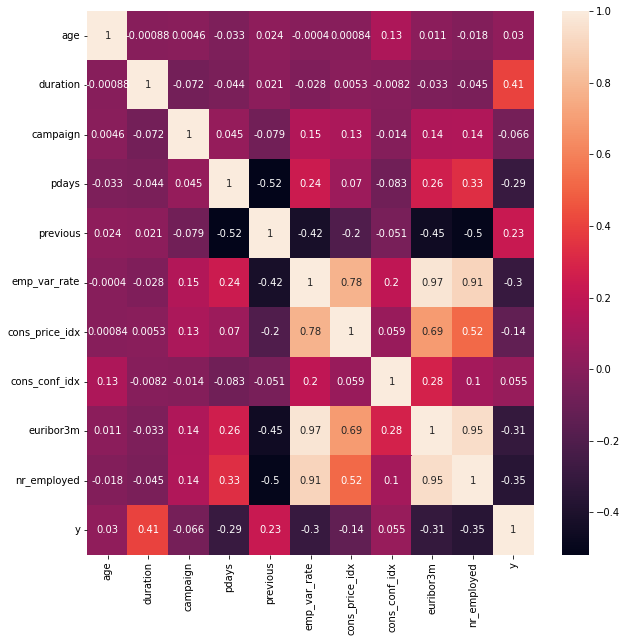

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [37]:
obj_cols.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [38]:
obj_cols.drop(['age','month','day_of_week'],axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
df = data
for m in obj_cols:
  dummies =pd.get_dummies(data[m],drop_first=True)
  df = pd.concat([df,dummies],axis='columns')

In [40]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,high.school,illiterate,professional.course,university.degree,yes,yes,yes,telephone,nonexistent,success
0,44,BLUE-COLLAR,married,basic.4y,no,yes,no,cellular,aug,thu,...,0,0,0,0,0,1,0,0,1,0
1,53,TECHNICIAN,married,university.degree,no,no,no,cellular,nov,fri,...,0,0,0,1,0,0,0,0,1,0
2,28,MANAGEMENT,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,1,0,1,0,0,0,1
3,39,SERVICES,married,high.school,no,no,no,cellular,apr,fri,...,1,0,0,0,0,0,0,0,1,0
4,55,RETIRED,married,basic.4y,no,yes,no,cellular,aug,fri,...,0,0,0,0,0,1,0,0,0,1


In [41]:
df.drop(['job','marital','education','default','housing','loan','contact','day_of_week','month','poutcome'],axis=1,inplace=True)

In [42]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,high.school,illiterate,professional.course,university.degree,yes,yes,yes,telephone,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,0,1,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,1,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,1,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,1,0,0,0,1


In [43]:
df.drop(['y'],axis=1,inplace=True)

In [44]:
df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,high.school,illiterate,professional.course,university.degree,yes,yes,yes,telephone,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,0,1,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,1,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,1,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,1,0,0,0,1


In [45]:
x = df.iloc[:,:-1]
display(x)
y = df.iloc[:,-1]
display(y)

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,basic.9y,high.school,illiterate,professional.course,university.degree,yes,yes,yes,telephone,nonexistent
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,0,0,1,0,0,1
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,0,0,1,0,0,0,0,1
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,1,0,0,0
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,1,0,0,0,0,0,0,0,1
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,...,0,1,0,0,0,0,0,1,1,1
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,0,0,0,0,1,1
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,1,0,1,1,1,1
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,...,0,0,0,1,0,0,0,1,1,1


0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: success, Length: 41188, dtype: uint8

In [56]:
import imblearn


In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.25, )

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(verbose=0)
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [48]:
lr.score(x_train,y_train)

0.9971512738338028

In [49]:
lr.score(x_test,y_test)

0.9962124890744877

In [50]:
pred = lr.predict(x_test)
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9939
           1       0.93      0.96      0.95       358

    accuracy                           1.00     10297
   macro avg       0.97      0.98      0.97     10297
weighted avg       1.00      1.00      1.00     10297



In [52]:
print(accuracy_score(y_test,pred)*100)

99.62124890744877


[[9915   24]
 [  15  343]]


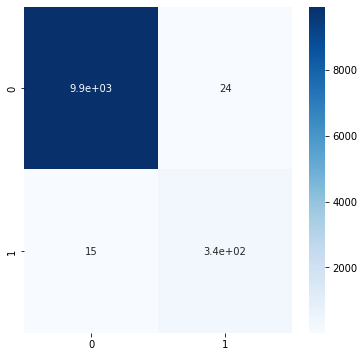

In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
cm= confusion_matrix(y_test, pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues');

In [54]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

#Select best feature 
rfe = RFE(lr, n_features_to_select= None)
rfe = rfe.fit(x_train, y_train)

#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False  True  True  True  True False  True False  True  True
  True  True False  True False  True False False  True False False False
 False False False  True False  True  True  True False]
[11 17  2  1  1  1  1  7  1 13  1  1  1  1  8  1  5  1 10  3  1  4 16  9
  6 14 12  1 18  1  1  1 15]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
